In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from src.gameSimulation import GameUr,Strategies,Player,Dice,GameSettings,Multirun
from multiprocessing import Process, Queue
import multiprocessing as mp





In [2]:
s = Strategies.RandomStrategy()
p0 = Player.Player(0, 7, s)
p1 = Player.Player(1, 7, s)
d = Dice.MultiD2Dice(4)
gs = GameSettings.GameSettings([p0, p1], d, 4, 8, 2, [8], [4, 8, 13])


In [3]:
gl,w = Multirun.multirun(100,gs)
    

10
11
110
start pool
finish pool


In [4]:
gl_stacked = [(i,gl.count(i)) for i in range(np.min(gl),np.max(gl)+1)]

gl_stacked
np.average(gl)
# np.min(gl)
# np.max(gl)


47.54545454545455

<BarContainer object of 41 artists>

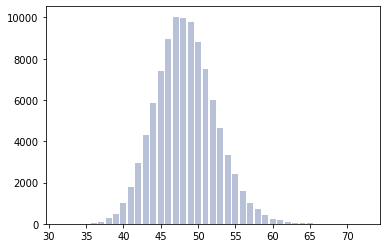

In [6]:
plt.bar([x for x, _ in gl_stacked], [
        y for _, y in gl_stacked], color=(0.1, 0.2, 0.5, 0.3))


In [ ]:
step_counts.sort()
print("max:" + str(step_counts[-1]))
print("min:" + str(step_counts[0]))
numpy.mean(step_counts)

max:23
min:6


11.00066

In [ ]:
game_length = 14

current_pos = -1

step_count = 0



while current_pos <= game_length:
       step_count += 1
       for i in range(current_pos):
              print(" ", end='')
       print("┠", end='')
       move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
       for i in range(move_dist-1):
              print("─", end='')
       print("┨ "+ str(move_dist) )

       current_pos+= move_dist

       print("┠╂", end='')
       for i in range(game_length-1):
              print("┬", end='')
       print("╂┨ "+str(current_pos))
       for i in range(current_pos):
              print(" ", end='')
       print("┃")

 


┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 1
 ┃
 ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 3
   ┃
   ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 5
     ┃
     ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 6
      ┃
      ┠──┨ 3
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 9
         ┃
         ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 11
           ┃
           ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 13
             ┃
             ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 14
              ┃
              ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 15
               ┃
